# ESTATÍSTICA INICIAL

# IMPORTAR OS MÓDULOS

In [1]:
# IMPORT PARA ANÁLISE
import pandas as pd
import numpy as np

# IMPORT PARA GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sn

sn.set(style='whitegrid')
sn.set_palette('Blues_d', n_colors=10)

%matplotlib inline

# CONFIGURAÇÃO DO TAMANHO DO GRÁFICO
from pylab import rcParams
rcParams['figure.figsize'] = 16, 4

# CARREGAR A BASE DE DADOS

In [2]:
dados = pd.read_csv('2020 alunos.csv')

# ANÁLISE DOS DADOS

In [3]:
dados

,nome,idade,classe,matematica,portugues
0,Luiza,16,A,38,56
1,Enzo,15,A,69,75
2,Carolina,16,A,24,69
3,Enzo Gabriel,14,A,78,40
4,Isadora,14,A,48,77
5,Fernando,15,A,56,41
6,Ana Sophia,16,A,60,62
7,Arthur,14,A,99,63
8,Sofia,16,A,21,49
9,Bárbara,15,A,75,41


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nome        10 non-null     object
 1   idade       10 non-null     int64 
 2   classe      10 non-null     object
 3   matematica  10 non-null     int64 
 4   portugues   10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [5]:
dados.describe()

,idade,matematica,portugues
count,10.000000,10.000000,10.000000
mean,15.100000,56.800000,57.300000
std,0.875595,24.742227,14.118939
min,14.000000,21.000000,40.000000
25%,14.250000,40.500000,43.000000
50%,15.000000,58.000000,59.000000
75%,16.000000,73.500000,67.500000
max,16.000000,99.000000,77.000000


# CRIANDO UMA FUNÇÃO PARA ANÁLISE

In [10]:
def estatistica(dados, coluna):
    print('Média: ', dados[coluna].mean())
    print('Mediana: ', dados[coluna].median())
    if dados[coluna].value_counts().values.max() > 1:
        moda = dados[coluna].value_counts()
        print('Moda: ', moda[moda == moda.max()])
    else:
        print('Moda: []')
    
    print('Máximo: ', dados[coluna].max())
    print('Mínimo: ', dados[coluna].min())
    print('Variância: ', dados[coluna].var())
    print('Desvio Padrão: ', dados[coluna].std())

In [11]:
estatistica(dados, 'matematica')

Média:  56.8
Mediana:  58.0
Moda: []
Máximo:  99
Mínimo:  21
Variância:  612.1777777777778
Desvio Padrão:  24.742226613176467


In [12]:
estatistica(dados, 'portugues')

Média:  57.3
Mediana:  59.0
Moda:  41    2
Name: portugues, dtype: int64
Máximo:  77
Mínimo:  40
Variância:  199.3444444444444
Desvio Padrão:  14.118939211018809


# ANÁLISE DA IDADE

In [13]:
estatistica(dados, 'idade')

Média:  15.1
Mediana:  15.0
Moda:  16    4
Name: idade, dtype: int64
Máximo:  16
Mínimo:  14
Variância:  0.7666666666666666
Desvio Padrão:  0.8755950357709131


(array([3., 3., 4.]),
 array([14.        , 14.66666667, 15.33333333, 16.        ]),
 <a list of 3 Patch objects>)

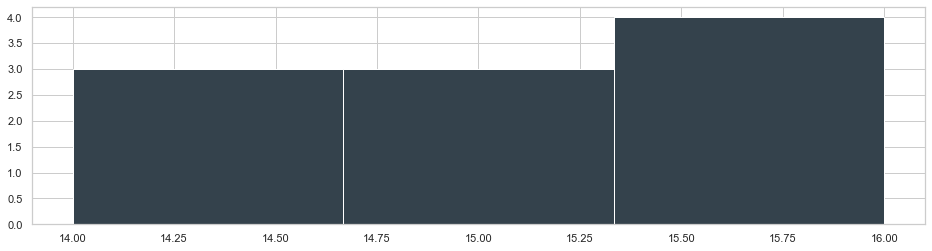

In [15]:
plt.hist(dados['idade'], bins=3)

# ANÁLISE DA MATÉRIA MATEMÁTICA

In [18]:
materia = 'matematica'

estatistica(dados, materia)

Média:  56.8
Mediana:  58.0
Moda: []
Máximo:  99
Mínimo:  21
Variância:  612.1777777777778
Desvio Padrão:  24.742226613176467


(array([3., 4., 3.]), array([21., 47., 73., 99.]), <a list of 3 Patch objects>)

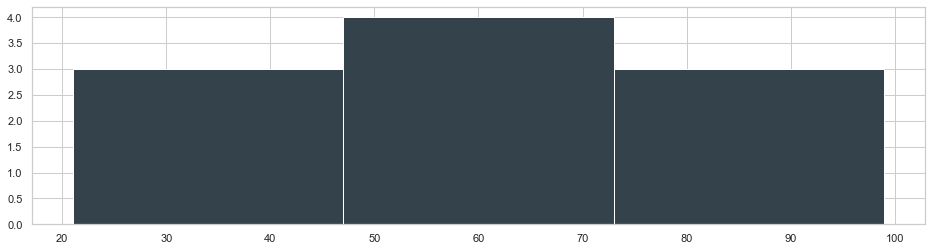

In [20]:
plt.hist(dados[materia], bins=3)

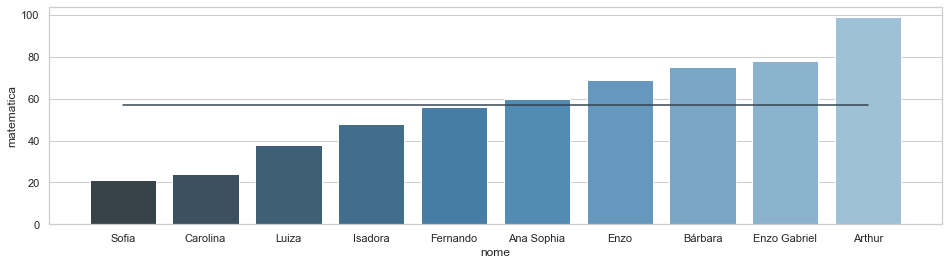

In [24]:
sn.barplot('nome', materia, data=dados.sort_values(materia))
plt.plot(list(range(10)), [float(dados[materia].mean())]*10)

# ANÁLISE DA MATÉRIA PORTUGUÊS

In [25]:
materia = 'portugues'

estatistica(dados, materia)

Média:  57.3
Mediana:  59.0
Moda:  41    2
Name: portugues, dtype: int64
Máximo:  77
Mínimo:  40
Variância:  199.3444444444444
Desvio Padrão:  14.118939211018809


(array([4., 3., 3.]),
 array([40.        , 52.33333333, 64.66666667, 77.        ]),
 <a list of 3 Patch objects>)

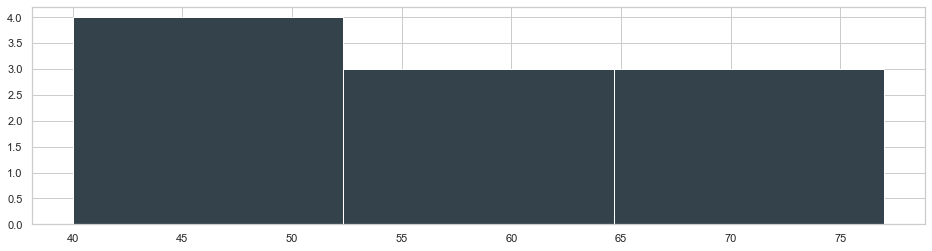

In [26]:
plt.hist(dados[materia], bins=3)

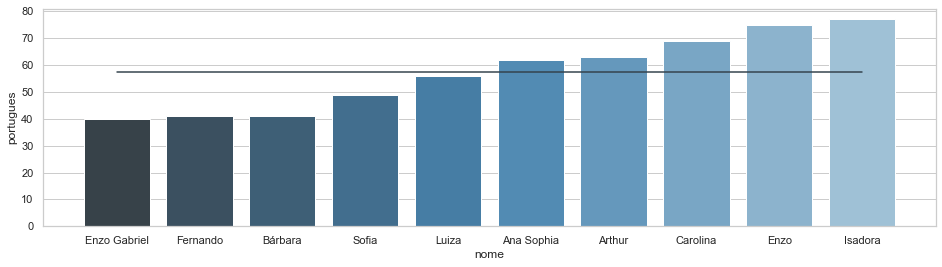

In [27]:
sn.barplot('nome', materia, data=dados.sort_values(materia))
plt.plot(list(range(10)), [float(dados[materia].mean())]*10)

# ANÁLISE DAS DUAS MATÉRIAS

<BarContainer object of 10 artists>

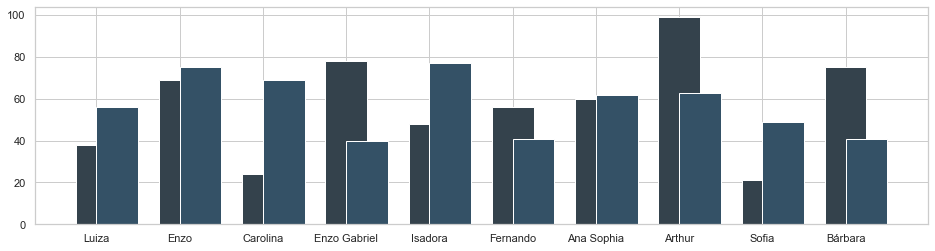

In [29]:
plt.bar(x=dados['nome'], height=dados['matematica'], width=0.5, align='center')
plt.bar(x=dados['nome'], height=dados['portugues'], width=0.5, align='edge')

In [30]:
dados[['matematica', 'portugues']].describe()

,matematica,portugues
count,10.000000,10.000000
mean,56.800000,57.300000
std,24.742227,14.118939
min,21.000000,40.000000
25%,40.500000,43.000000
50%,58.000000,59.000000
75%,73.500000,67.500000
max,99.000000,77.000000


# NORMALIZAR OS DADOS

In [31]:
dp = dados['matematica'].std()

In [32]:
dp

24.742226613176467

In [33]:
dados['m'] = dados['matematica'] - dados['matematica'].mean()

In [36]:
dados

,nome,idade,classe,matematica,portugues,m
0,Luiza,16,A,38,56,-0.759835
1,Enzo,15,A,69,75,0.493084
2,Carolina,16,A,24,69,-1.325669
3,Enzo Gabriel,14,A,78,40,0.856835
4,Isadora,14,A,48,77,-0.355667
5,Fernando,15,A,56,41,-0.032333
6,Ana Sophia,16,A,60,62,0.129334
7,Arthur,14,A,99,63,1.705586
8,Sofia,16,A,21,49,-1.446919
9,Bárbara,15,A,75,41,0.735585


In [35]:
dados['m'] = dados['m'] / dp

In [38]:
dados['m'].describe().round()

count    10.0
mean      0.0
std       1.0
min      -1.0
25%      -1.0
50%       0.0
75%       1.0
max       2.0
Name: m, dtype: float64

In [39]:
dp = dados['portugues'].std()

In [40]:
dp

14.118939211018809

In [41]:
dados['p'] = dados['portugues'] - dados['portugues'].mean()

In [42]:
dados

,nome,idade,classe,matematica,portugues,m,p
0,Luiza,16,A,38,56,-0.759835,-1.3
1,Enzo,15,A,69,75,0.493084,17.7
2,Carolina,16,A,24,69,-1.325669,11.7
3,Enzo Gabriel,14,A,78,40,0.856835,-17.3
4,Isadora,14,A,48,77,-0.355667,19.7
5,Fernando,15,A,56,41,-0.032333,-16.3
6,Ana Sophia,16,A,60,62,0.129334,4.7
7,Arthur,14,A,99,63,1.705586,5.7
8,Sofia,16,A,21,49,-1.446919,-8.3
9,Bárbara,15,A,75,41,0.735585,-16.3


In [43]:
dados['p'] = dados['p'] / dp

In [45]:
dados['p'].describe().round()

count    10.0
mean      0.0
std       1.0
min      -1.0
25%      -1.0
50%       0.0
75%       1.0
max       1.0
Name: p, dtype: float64

(array([3., 4., 3.]),
 array([-1.44691909, -0.396084  ,  0.6547511 ,  1.70558619]),
 <a list of 3 Patch objects>)

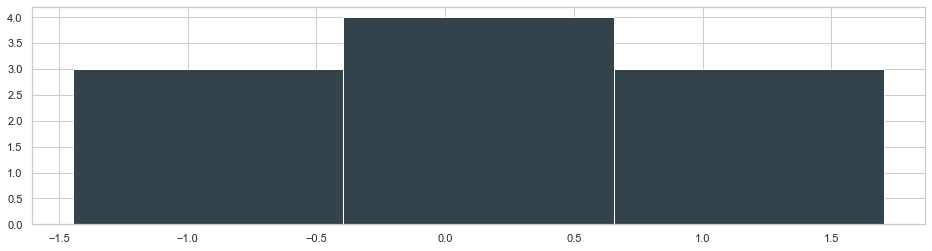

In [47]:
plt.hist(dados['m'], bins=3)

(array([4., 3., 3.]),
 array([-1.22530452, -0.35177336,  0.5217578 ,  1.39528896]),
 <a list of 3 Patch objects>)

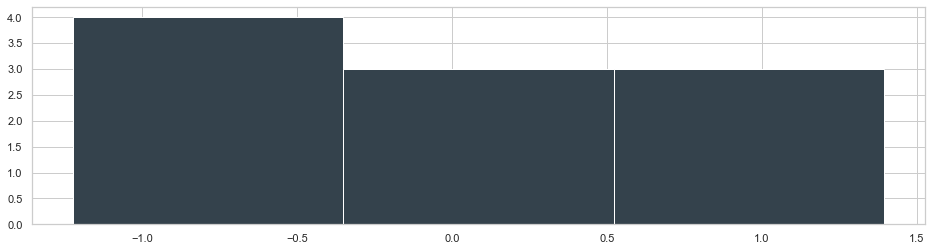

In [48]:
plt.hist(dados['p'], bins=3)

# DESVIO PADRÃO 1 E MÉDIA 0

<BarContainer object of 10 artists>

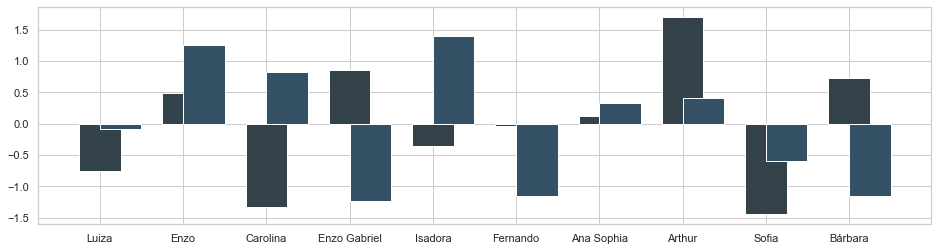

In [50]:
plt.bar(x=dados['nome'], height=dados['m'], width=0.5, align='center')
plt.bar(x=dados['nome'], height=dados['p'], width=0.5, align='edge')

# TRANSFORMAR O DESVIO PADRÃO E A MÉDIA

In [51]:
dados['m'] *= 10
dados['m'] += 50

In [52]:
dados

,nome,idade,classe,matematica,portugues,m,p
0,Luiza,16,A,38,56,42.401654,-0.092075
1,Enzo,15,A,69,75,54.930842,1.253635
2,Carolina,16,A,24,69,36.743311,0.828674
3,Enzo Gabriel,14,A,78,40,58.568348,-1.225305
4,Isadora,14,A,48,77,46.443327,1.395289
5,Fernando,15,A,56,41,49.676666,-1.154478
6,Ana Sophia,16,A,60,62,51.293335,0.332886
7,Arthur,14,A,99,63,67.055862,0.403713
8,Sofia,16,A,21,49,35.530809,-0.587863
9,Bárbara,15,A,75,41,57.355846,-1.154478


In [53]:
dados['p'] *= 10
dados['p'] += 50

<BarContainer object of 10 artists>

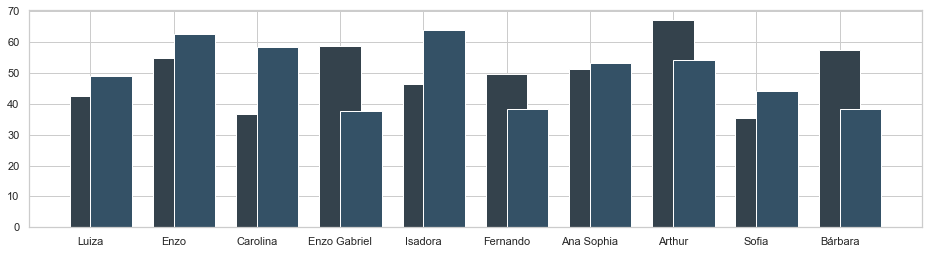

In [55]:
plt.bar(x=dados['nome'], height=dados['m'], width=0.5, align='center')
plt.bar(x=dados['nome'], height=dados['p'], width=0.5, align='edge')

In [56]:
dados['media'] = dados[['m', 'p']].apply(lambda x: (x[0] + x[1])/2, axis=1)

In [57]:
dados

,nome,idade,classe,matematica,portugues,m,p,media
0,Luiza,16,A,38,56,42.401654,49.079251,45.740452
1,Enzo,15,A,69,75,54.930842,62.536353,58.733597
2,Carolina,16,A,24,69,36.743311,58.286742,47.515026
3,Enzo Gabriel,14,A,78,40,58.568348,37.746955,48.157651
4,Isadora,14,A,48,77,46.443327,63.952890,55.198108
5,Fernando,15,A,56,41,49.676666,38.455223,44.065945
6,Ana Sophia,16,A,60,62,51.293335,53.328862,52.311099
7,Arthur,14,A,99,63,67.055862,54.037130,60.546496
8,Sofia,16,A,21,49,35.530809,44.121371,39.826090
9,Bárbara,15,A,75,41,57.355846,38.455223,47.905534


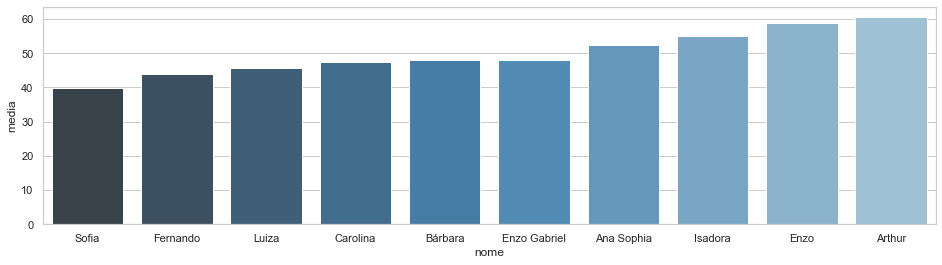

In [59]:
sn.barplot(x='nome', y='media', data=dados.sort_values('media'))

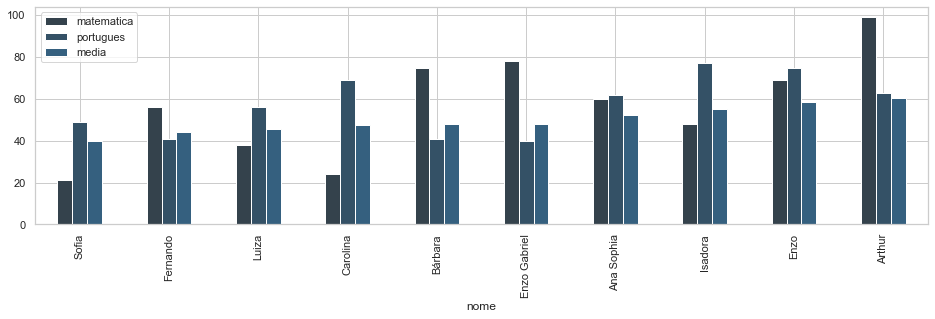

In [60]:
dados.sort_values('media', inplace=True)

dados[['nome', 'matematica', 'portugues', 'media']].plot(kind='bar', x='nome')